# Population change

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Values are hand selected from the [Urban Audit 2015](https://www.bfs.admin.ch/bfs/fr/home/statistiques/themes-transversaux/city-statistics.assetdetail.255571.html), namely from the variable DE1001V (Total Resident Population), except for the values from 2017, which are selected from the [Agglomeration portraits](https://www.bfs.admin.ch/bfs/en/home/statistics/cross-sectional-topics/city-statistics/agglomeration-portraits.html)

In [ ]:
population_df = pd.DataFrame({},
                             index=[1990, 2000, 2010, 2017],
                             columns=pd.MultiIndex.from_product(
                                 [['Bern', 'Lausanne', 'Zurich'],
                                  ['city', 'agglomeration']]))
population_df.loc[:, ('Bern', 'city')] = [136338, 128634, 130289, 133115]
population_df.loc[:, ('Bern',
                      'agglomeration')] = [351084, 349157, 357668, 415785]
population_df.loc[:, ('Lausanne', 'city')] = [128112, 124914, 133269, 137810]
population_df.loc[:, ('Lausanne',
                      'agglomeration')] = [300280, 311441, 339389, 415596]
population_df.loc[:, ('Zurich', 'city')] = [365043, 363273, 382906, 402762]
population_df.loc[:, ('Zurich',
                      'agglomeration')] = [1021859, 1080728, 1191058, 1354140]

In [ ]:
change_df = population_df.pct_change(fill_method='pad') * 100
change_df.index = [0] + [
    f'{start}-{end}'
    for start, end in zip(change_df.index, change_df.index[1:])
]
change_df = change_df.dropna().unstack().reset_index()
change_df.columns = ['City', 'Extent', 'Period', 'Population change (%)']

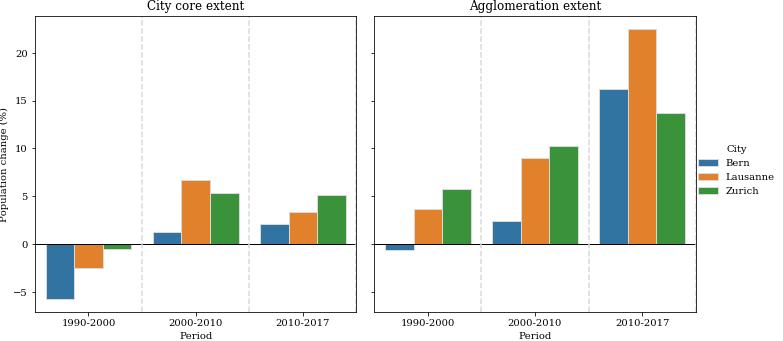

In [ ]:
g = sns.catplot(
    data=change_df,
    col='Extent',
    x='Period',
    y='Population change (%)',
    hue='City',
    kind='bar',
    facet_kws={'despine': False})

for ax in g.axes[0]:
    ax.axhline(0, color='k', linewidth=1)
    num_xticks = len(ax.get_xticks())
    step = 1 / num_xticks
    for x in np.arange(step, 1 + step, step):
        ax.add_line(
            plt.Line2D([x, x], [0, 1],
                       color='.85',
                       linestyle='--',
                       transform=ax.transAxes))

g.axes[0, 0].set_title('City core extent')
g.axes[0, 1].set_title('Agglomeration extent')

g.fig.savefig('../reports/figures/population_change.pdf')